# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [1]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [15]:
# Splitting our data and initializing a Scaler

X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    random_state=42)

ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
# Transforming our data

X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

X_train_s.shape

(426, 30)

In [17]:
X_train_s[:1, :]

array([[-0.34913849, -1.43851335, -0.41172595, -0.39047943, -1.86366229,
        -1.26860704, -0.82617052, -0.95286585, -1.72936805, -0.9415409 ,
        -0.86971355, -1.35865347, -0.83481506, -0.57230673, -0.74586846,
        -0.65398319, -0.52583524, -0.94677147, -0.53781728, -0.63449458,
        -0.54268486, -1.65565452, -0.58986401, -0.52555985, -1.51066925,
        -0.89149994, -0.75021715, -0.91671059, -0.92508585, -0.80841115]])

## Constructing a Neural Network in Keras

In [20]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

#Import optimizer

from keras.optimizers import Adam

In [30]:
# Constructing and compiling our model
#Create Model
model = Sequential()

#Create Input
inputs = X_train.shape[1]


hiddens = inputs

#Add hidden nodes
model.add(Dense(hiddens, input_dim=inputs, activation='relu'))
model.add(Dense(1))
adam = Adam()

#Compile ** Re-Run compile statement if we are changing epochs number in next cell **
model.compile(optimizer=adam, loss='mean_squared_error')

In [31]:
# Fitting our model

model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=99)


Train on 426 samples, validate on 143 samples
Epoch 1/99
426/426 [==============================] - 0s 567us/step - loss: 1.8395 - val_loss: 1.1748
Epoch 2/99
426/426 [==============================] - 0s 48us/step - loss: 0.9343 - val_loss: 0.6084
Epoch 3/99
426/426 [==============================] - 0s 54us/step - loss: 0.4668 - val_loss: 0.3390
Epoch 4/99
426/426 [==============================] - 0s 59us/step - loss: 0.2823 - val_loss: 0.2277
Epoch 5/99
426/426 [==============================] - 0s 60us/step - loss: 0.2189 - val_loss: 0.1819
Epoch 6/99
426/426 [==============================] - 0s 47us/step - loss: 0.1867 - val_loss: 0.1590
Epoch 7/99
426/426 [==============================] - 0s 53us/step - loss: 0.1660 - val_loss: 0.1476
Epoch 8/99
426/426 [==============================] - 0s 57us/step - loss: 0.1462 - val_loss: 0.1314
Epoch 9/99
426/426 [==============================] - 0s 64us/step - loss: 0.1345 - val_loss: 0.1264
Epoch 10/99
426/426 [=======================

Epoch 81/99
426/426 [==============================] - 0s 47us/step - loss: 0.0251 - val_loss: 0.0579
Epoch 82/99
426/426 [==============================] - 0s 41us/step - loss: 0.0248 - val_loss: 0.0581
Epoch 83/99
426/426 [==============================] - 0s 53us/step - loss: 0.0246 - val_loss: 0.0573
Epoch 84/99
426/426 [==============================] - 0s 49us/step - loss: 0.0243 - val_loss: 0.0572
Epoch 85/99
426/426 [==============================] - 0s 44us/step - loss: 0.0241 - val_loss: 0.0582
Epoch 86/99
426/426 [==============================] - 0s 44us/step - loss: 0.0239 - val_loss: 0.0564
Epoch 87/99
426/426 [==============================] - 0s 43us/step - loss: 0.0233 - val_loss: 0.0565
Epoch 88/99
426/426 [==============================] - 0s 45us/step - loss: 0.0231 - val_loss: 0.0566
Epoch 89/99
426/426 [==============================] - 0s 45us/step - loss: 0.0227 - val_loss: 0.0555
Epoch 90/99
426/426 [==============================] - 0s 43us/step - loss: 0.0225

In [32]:
# Storing that fit as a history log

history_log = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=99)

Train on 426 samples, validate on 143 samples
Epoch 1/99
426/426 [==============================] - 0s 65us/step - loss: 0.0204 - val_loss: 0.0553
Epoch 2/99
426/426 [==============================] - 0s 56us/step - loss: 0.0201 - val_loss: 0.0539
Epoch 3/99
426/426 [==============================] - 0s 55us/step - loss: 0.0199 - val_loss: 0.0547
Epoch 4/99
426/426 [==============================] - 0s 50us/step - loss: 0.0197 - val_loss: 0.0548
Epoch 5/99
426/426 [==============================] - 0s 49us/step - loss: 0.0195 - val_loss: 0.0520
Epoch 6/99
426/426 [==============================] - 0s 49us/step - loss: 0.0198 - val_loss: 0.0539
Epoch 7/99
426/426 [==============================] - 0s 68us/step - loss: 0.0192 - val_loss: 0.0530
Epoch 8/99
426/426 [==============================] - 0s 60us/step - loss: 0.0190 - val_loss: 0.0547
Epoch 9/99
426/426 [==============================] - 0s 67us/step - loss: 0.0187 - val_loss: 0.0531
Epoch 10/99
426/426 [========================

Epoch 81/99
426/426 [==============================] - 0s 52us/step - loss: 0.0107 - val_loss: 0.0497
Epoch 82/99
426/426 [==============================] - 0s 62us/step - loss: 0.0107 - val_loss: 0.0486
Epoch 83/99
426/426 [==============================] - 0s 65us/step - loss: 0.0110 - val_loss: 0.0487
Epoch 84/99
426/426 [==============================] - 0s 47us/step - loss: 0.0110 - val_loss: 0.0485
Epoch 85/99
426/426 [==============================] - 0s 55us/step - loss: 0.0121 - val_loss: 0.0518
Epoch 86/99
426/426 [==============================] - 0s 53us/step - loss: 0.0109 - val_loss: 0.0500
Epoch 87/99
426/426 [==============================] - 0s 46us/step - loss: 0.0111 - val_loss: 0.0498
Epoch 88/99
426/426 [==============================] - 0s 54us/step - loss: 0.0105 - val_loss: 0.0495
Epoch 89/99
426/426 [==============================] - 0s 50us/step - loss: 0.0105 - val_loss: 0.0491
Epoch 90/99
426/426 [==============================] - 0s 47us/step - loss: 0.0103

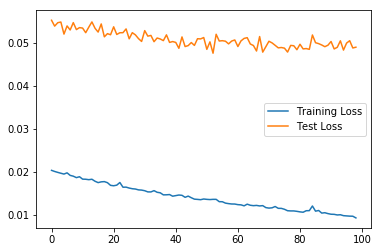

In [34]:
# Plotting our losses

train_loss = history_log.history['loss']
test_loss = history_log.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend();

## Tensorflow

In [35]:
import tensorflow as tf

### Tensorflow as a graph constructor

In [40]:
# Constructing the graph

a = tf.Variable(4)
b = tf.Variable(5)

c = a + b
d = a + c * b

In [41]:
# Starting a session

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(d)

In [42]:
# Printing the output

print(result)

49


### Neural Network

In [43]:
X_train_s.shape

(426, 30)

In [44]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.


In [45]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_s,
                                          y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test_s})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.986013986013986